# 확률변수의 상관 관계

- 명제의 종류(정보(data)가 있으면 명제가 될 수 있음)
    1. $x$ = 남자이다 또는 $x$ = 10이다.
    2. $x$ = a이면, $y$ = b에 영향을 미친다(상관관계)

                       
- 상관관계(correltation) $\ne$ 인과관계(causality)
    - 시계열 정보가 있으면 간접적으로 인과관계를 분석할 수 있지만 그 외에는 인과관계분석이 불가능하다. 그러므로 시각적, 정성적으로 판단하여 주장한다.
    - 일반적으로 인과관계를 알고싶지만 상관관계만 알 수 있고, 상관관계는 인과관계의 필요조건일 뿐이다.
    
    
- **$X$, $Y$의 관계성 판단**
  - 일반적으로 그래프에서는 $X$축이 원인, $Y$축을 결과로 해석한다.
  
| X | Y | 정량적 판단 | 정성적 판단 |
|-|-|-|-|
|연속| 연속 | 상관계수 | scatter plot |
|이산| 이산 | 이항검정(확률변수가 2개), | heatmap |     
| | | chi-square test(3개 이상) | |     
|이산| 연속 | one-way ANOVA분석 | box plot |

## 결합확률과 조건부확률
### 다변수 이산확률변수의 결합/조건부 확률

카테고리 값을 가질 수 있는 이산확률변수가 두 개 이상 있는 경우에는 각각의 확률변수에 대한 확률분포 이외에도 확률분포 쌍이 가지는 복합적인 확률분포를 살펴보아야 한다.

예를 들어 1부터 6까지의 값을 가지는 카테고리 분포 확률변수 $X$ 와 $Y$를 생각하자. 확률변수 각각의 확률적 특성은 확률질량함수(pmf), $P_X(x), P_Y(y)$ 로 나타낼 수 있다. 확률질량함수의 아랫 첨자로 확률변수 이름을 지정하여 어떤 확률 변수의 확률질량함수인지 표시한다.

확률질량함수의 독립변수 $x$는 나타낼 수 있는 어떤 숫자, 종속변수 $P$는 그 숫자가 나타날 확률이다. 즉 $P_X(x=1)$ 또는 $P_X(1)$은 확률변수 $X$의 값이 1이 나올 확률이다.

### 결합 확률질량함수¶
이번에는 하나의 값이 아닌 두 개의 값, 즉 특정한 숫자 쌍이 나타나는 경우를 생각하자. 단변수 이산확률변수에서와 마찬가지로 하나의 숫자 쌍만을 가지는 사건,즉 아톰(atom) 사건에 대한 확률만 알고 있으면 임의의 숫자 쌍 집합 즉, 임의의 사건에 대해서도 확률을 계산할 수 있으므로 하나 하나의 숫자 쌍에 대해 확률을 알려주는 확률질량함수만 있으면 전체 확률분포를 알 수 있다. 이러한 확률질량함수를 결합 확률질량함수(joint probability mass function)이라고 하며 다음과 같이 표시한다.

$$P_{XY}(x,y)$$
 
이 때는 나타날 수 있는 숫자가 두 숫자로 이루어진 쌍이므로 독립변수가  x,y  두 개가 된다. 종속변수는 그 숫자 쌍이 나타날 확률이다. 즉, $P_{XY}(2,3)$은 ${x=2,y=3}$이라는 특정한 숫자 쌍으로만 이루어진 사건의 확률이다.

예를 들어 어느 대학교에서 X, Y 두 과목에 대해 시험을 보고 그 결과를 각각 A, B, C, D, E, F 학점으로 발표했다고 하자. 이 대학교의 시험결과는 다음과 같은 결합 확률 밀도 함수를 가질 수 있다.

In [2]:
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 7, 4, 1, 0],
                [0, 1, 4, 5, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])

In [3]:
pmf.sum()

50

In [4]:
pmf = pmf / pmf.sum()
pmf

array([[0.02, 0.04, 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.06, 0.02, 0.  , 0.  ],
       [0.  , 0.08, 0.14, 0.08, 0.02, 0.  ],
       [0.  , 0.02, 0.08, 0.1 , 0.08, 0.  ],
       [0.  , 0.  , 0.02, 0.06, 0.04, 0.  ],
       [0.  , 0.  , 0.  , 0.02, 0.04, 0.02]])

In [2]:
%matplotlib inline

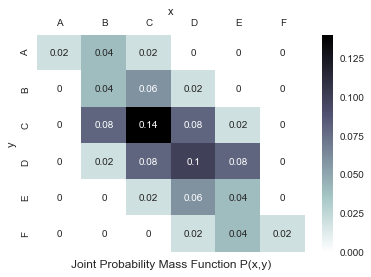

In [9]:
ax = sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True,
                 xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
                 yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Mass Function P(x,y)", y=-0.1)
plt.show()

##### 연습 문제 1¶
1. 이 확률변수의 표본 값이 (D,F)일 확률을 구하라.
2. 이 확률변수의 표본 값이 (F,A)일 확률을 구하라.
3. 확률 변수의 값을 모른다고 할 때 어떤 값이 나올 가능성이 가장 높은가.
---
1. P(D, F) = 0.02
2. P(F, A) = 0
3. (C, C)

만약 $y$값이 특정한 값으로 고정되었다면 확률 질량 함수의 단면을 이용하여 다음과 같이 그릴 수도 있다.

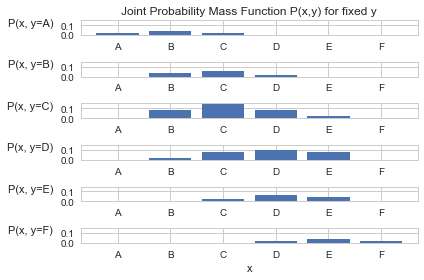

In [10]:
x = np.arange(6)
plt.subplot(611); plt.bar(x, pmf[0, :]); plt.ylabel("P(x, y=A)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Joint Probability Mass Function P(x,y) for fixed y")
plt.subplot(612); plt.bar(x, pmf[1, :]); plt.ylabel("P(x, y=B)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(613); plt.bar(x, pmf[2, :]); plt.ylabel("P(x, y=C)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(614); plt.bar(x, pmf[3, :]); plt.ylabel("P(x, y=D)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(615); plt.bar(x, pmf[4, :]); plt.ylabel("P(x, y=E)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(616); plt.bar(x, pmf[5, :]); plt.ylabel("P(x, y=F)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.xlabel("x")
plt.tight_layout()
plt.show()

##### 연습 문제 2¶
1. 만약 확률 변수  Y 의 값이 A가 나왔다면 확률 변수  X 의 값은 어떤 값이 나올 가능성이 가장 높은가.
2. 만약 확률 변수  Y 의 값이 C가 나왔다면 확률 변수  X 의 값은 어떤 값이 나올 가능성이 가장 높은가.
---
1. B
2. C

### 주변 확률질량함수(marginal probability mass function)
두 확률변수 중 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수이다. 다변수가 되기 이전의 단변수 확률질량함수를 말한다.

결합 확률질량함수에서 주변 확률질량함수를 구하려면 전체 확률의 법칙에 의해 다른 변수가 가질 수 있는 모든 값의 결합확률질량함수를 합한 확률이 된다.

$$\begin{align}%\label{}
\nonumber  P_X(x) = \sum_{y_i} P_{XY}(x,y_i) \\
\nonumber  P_Y(y) = \sum_{x_i} P_{XY}(x_i,y) \\
\end{align}$$

위에서 예로 든 이산 확률 변수의 경우에 과목 X만 관심이 있다면 결합 확률 질량 함수 $P_{XY}(x,y)$로부터 $X$에 대한 주변 확률 질량 함수 $P_X(x)$를 구해야 한다.

주변 확률 질량 함수를 계산한 값은 다음과 같다.

$$P_X(A) = P_{XY}(A,A) + P_{XY}(A,B) + P_{XY}(A,C) + P_{XY}(A,D) + P_{XY}(A,E) + P_{XY}(A,F) = 0.02$$

In [11]:
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

array([0.02, 0.18, 0.32, 0.28, 0.18, 0.02])

In [12]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

##### 연습 문제 3¶
1. 확률변수  Y 의 표본 값이 A일 확률을 구하라.
2. 확률변수  X 의 표본 값이 B일 확률을 구하라.
---
1. 0.08
2. 0.18

### 조건부 확률질량함수(conditional probability mass function)
다변수 확률변수 중 하나의 값이 특정 값으로 고정되어 상수가 되어 버린 경우, 나머지 변수에 대한 확률질량함수를 말한다. 조건부 확률질량함수는 다음과 같이 정의된다.

$$P_{X \mid Y}(x \mid y) = \dfrac{P_{XY}(x, y)}{P_{Y}(y)} : y\text{값이 고정}$$
 
$$P_{Y \mid X}(y \mid x) = \dfrac{P_{XY}(x, y)}{P_{X}(x)} : x\text{값이 고정}$$
 
**조건부 확률질량함수의 모양은 결합질량함수 $P_{XY}(x,y)$에서 $y$값이 고정된 함수, 즉, 결합질량함수의 단면과 같아진다.** 다만 조건부 확률질량함수의 합은 1이 된다.

위에서 예로 든 이산 확률 변수의 경우의 조건부 확률 질량 함수를 계산하면 다음과 같다.

In [13]:
pmf[0, :]

array([0.02, 0.04, 0.02, 0.  , 0.  , 0.  ])

In [14]:
np.sum(pmf[0, :])

0.08

In [15]:
cond_y0 = pmf[0, :]/pmf_marginal_y[0]
cond_y0

array([0.25, 0.5 , 0.25, 0.  , 0.  , 0.  ])

In [16]:
np.sum(cond_y0)

1.0

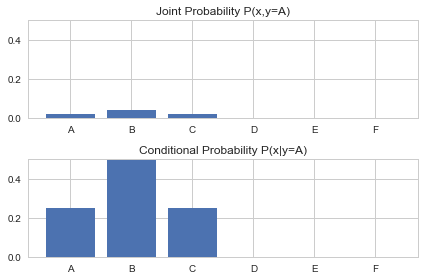

In [17]:
plt.subplot(211); plt.bar(x, pmf[0, :]); plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Joint Probability P(x,y=A)")
plt.subplot(212); plt.bar(x, cond_y0); plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Conditional Probability P(x|y=A)")
plt.tight_layout()
plt.show()

### 다변수 연속확률변수의 결합/조건부확률¶
연속확률분포에서는 이산확률분포와 같이 아톰(atom) 이벤트를 이용한 확률의 정의가 불가능하므로 단변수 연속확률변수처럼 누적확률분포함수를 먼저 정의한 후 이를 미분하여 확률밀도함수를 정의하는 방법을 사용한다.

### 결합 누적확률분포함수¶
두 연속 확률 변수 $X$, $Y$에 대한 결합 누적확률분포함수 $F_{XY}(x,y)$는 다음과 같이 정의한다.

$$F_{XY}(x,y)=P({X<x}∩{Y<y})=P({X<x,Y<y})$$
 
결합 누적확률분포함수 $F_{XY}(x,y)$는 다음과 같은 특성을 가진다.

$$F_{XY}(∞,∞)=1$$
 
$$F_{XY}(−∞,y)=F_{XY}(x,−∞)=0$$
 
만약 구간의 끝을 나타내는 두 독립 변수 $x$, $y$중 하나가 무한대 값을 가지는 경우에는 해당 변수의 값은 어떤 값을 가져도 상관없으므로 남은 하나의 변수에 대한 누적확률분포함수로 줄어든다. 이를 주변 누적확률분포(marginal cumulative probability distribution)이라고 한다.

$$F_X(x)=F_{XY}(x,∞)$$
 
$$F_Y(y)=F_{XY}(∞,y)$$

### 결합 확률밀도함수(joint probability density function)
단변수 확률변수의 경우처럼 결합 누적확률분포함수를 미분하여 결합 확률밀도함수를 정의할 수 있다. 독립 변수가 2개이므로 각각에 대해 모두 편미분(partial differentication)해야 한다.

$$f_{XY} = \dfrac{\partial^2 F_{XY}(x, y)}{\partial x \partial y}$$
 
결합 확률 밀도 함수를 특정 구간에 대해 적분하면 해당 구간에 대한 확률이 된다.

$$\int_{x_1}^{x_2} \int_{y_1}^{y_2} f_{XY}(x,y)dxdy = P\big(\{ x_1 \leq X \leq x_2, \; y_1 \leq Y \leq y_2 \}\big)$$
 
따라서 결합 확률 밀도 함수를 모든 변수에 대해 $−∞$에서 $∞$까지 적분하면 값이 1이 된다.

$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{XY}(x,y)dxdy=1$$
 
연속 확률 변수의 결합 확률 밀도 함수는 2차원 함수가 된다. 아래는 다변수 정규 분포의 결합 확률 밀도의 예를 그린 것이다. 어떤 집단에 대해 X는 몸무게, Y는 키를 나타내는 확률 변수라고 하자.

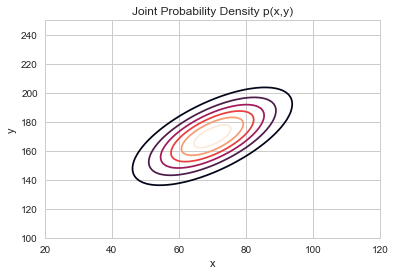

In [3]:
mu = [70, 170]
cov = [[150, 140], [140, 300]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.contour(XX, YY, ZZ)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Density p(x,y)")
plt.show()

동일한 결합 확률 밀도 함수를 3차원으로 그리면 아래와 같다.

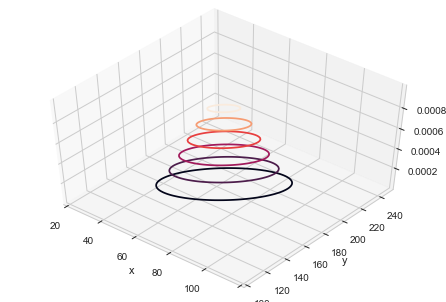

In [6]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.contour(XX, YY, ZZ)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.view_init(50, -50)
plt.show()

고정된 y값에 대해 확률 밀도 함수의 단면을 표시하면 다음과 같다.

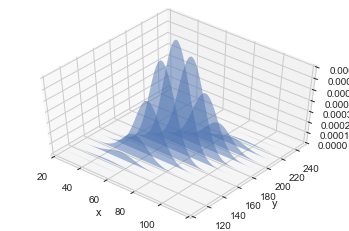

In [7]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure()
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlabel('z')
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.show()

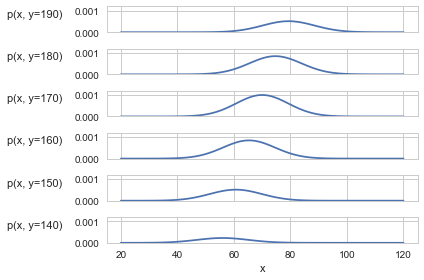

In [8]:
for i, j in enumerate(range(9, 3, -1)):
    ax = plt.subplot(6, 1, i + 1)
    plt.plot(xx, ZZ[j, :])
    plt.ylim(0, 0.0012)
    if i < 5:
        ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.show()

##### 연습 문제 1¶
1. 확률 변수의 값을 모른다고 할 때 어떤 값이 나올 가능성이 가장 높은가.
2. 만약 확률 변수 Y 의 값이 150이 나왔다면 확률 변수 X 의 값은 어떤 값이 나올 가능성이 가장 높은가.
---
1. X = 70, Y = 170
2. 60

### 주변 확률밀도함수(marginal probability density function)
**결합 확률밀도함수를 특정한 하나의 변수에 대해 가중평균한 값**을 말한다. 따라서 결합 확률밀도함수를 하나의 확률변수에 대해서만 적분하여 구한다.

가중평균(적분)으로 인해 차원이 한 개 줄어들기 때문에 2차원 확률 변수의 주변 확률 밀도 함수는 1차원 함수가 된다.

$$\begin{align}%\label{}
\nonumber  f_X(x) = \int_{-\infty}^{\infty} f_{XY}(x,y)dy \\
\nonumber  f_Y(y) = \int_{-\infty}^{\infty} f_{XY}(x,y)dx
\end{align}$$

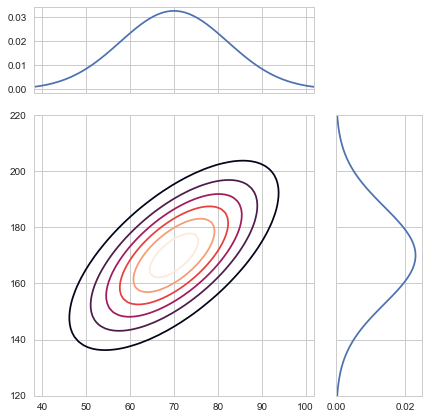

In [10]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6,6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax2.plot(xx, fx)
base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base)

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)
plt.show()

### 조건부 확률밀도함수(conditional probability density function)
**다변수 확률 변수 중 하나의 값이 특정 값이라는 사실이 알려진 경우,** 이러한 조건(가정)에 의해 변화한 나머지 확률변수에 대한 확률밀도함수를 말한다.

$$f_{X \mid Y}(x \mid y) = \dfrac{f_{XY}(x, y)}{f_{Y}(y)}$$
 
$$f_{Y \mid X}(y \mid x) = \dfrac{f_{XY}(x, y)}{f_{X}(x)}$$
 
조건부 확률밀도함수에서 조건이 되는 확률변수의 값은 특정한 값으로 고정되어 있으므로 변수가 아니라 모수로 생각할 수 있다. 예를 들어 $f_{X \mid Y}(x \mid y)$ 에서 $y$의 값은 고정되어 있으므로 이 값은 $x$의 함수가 된다.

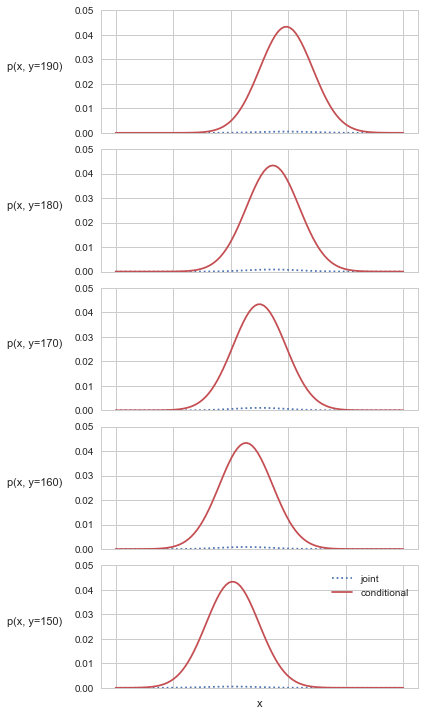

In [11]:
from scipy.integrate import simps # 심슨법칙(Simpson's rule)을 사용한 적분 계산

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

plt.figure(figsize=(6,10))

for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i + 1)
    plt.plot(xx, ZZ[j, :], 'b:', label="joint")
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal, 'r-', label="conditional")
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel("p(x, y={:.0f})".format(yy[j]), rotation=0, labelpad=40)
plt.xlabel("x")
plt.tight_layout()
plt.legend()
plt.show()